# 🧠 Shallow Neural Network from Scratch for Cat vs Dog Classification

This project demonstrates a full implementation of a feedforward neural network **from scratch** using only `NumPy` and `PIL`, without any deep learning frameworks like TensorFlow or PyTorch.

The model is trained to classify images of **cats vs dogs** from a dataset of labeled images. The process includes:

- Loading and preprocessing image data  
- Designing and initializing a two-layer neural network  
- Implementing forward and backward propagation  
- Training with gradient descent  
- Evaluating performance and visualizing the learning curve  
- Predicting custom images from a manual test set

> This notebook serves as an educational example to deepen understanding of neural networks by building one manually, step-by-step.
---
### 📦 Cell #1: Importing Required Libraries

This cell imports the essential Python libraries needed for building, visualizing, and managing the neural network workflow. Each library serves a specific purpose:

- `numpy`: Fundamental package for numerical operations and array handling.
- `matplotlib.pyplot`: Used for plotting and visualizing data and training results.
- `copy`: Provides functionality for creating deep or shallow copies of objects.
- `os`: Facilitates interaction with the operating system, such as file and directory handling.
- `PIL.Image`: From the Pillow library, used for opening, manipulating, and processing image files.

These libraries will support data preprocessing, model implementation, visualization, and general utility operations.


In [ ]:
import numpy as np # Import NumPy for numerical operations and array management
import matplotlib.pyplot as plt # Import Matplotlib's pyplot module for plotting and visualization
import copy # Import copy to enable object copying (deep and shallow)
import os # Import os for interacting with the operating system (e.g., file paths)
from PIL import Image # Import Image class from Pillow (PIL) for image processing tasks

---
### 📁 Cell #2: Set Paths to Image Directories

This cell defines the file paths for the training and testing image datasets. These paths point to the locations where the dataset has been extracted and stored locally.

- `train_data_dir`: Directory containing training images.
- `test_data_dir`: Directory containing test images.

Make sure to update these paths based on the actual location of your dataset in your file system.


In [34]:
# ================================
# 📁 Set Paths to Image Directories
# ================================

# Update these paths according to where you've extracted the dataset
train_data_dir = './dataset/training_set'  # Path to training dataset
test_data_dir = './dataset/test_set'       # Path to test dataset

---
### 🧠 Cell #3: Load and Preprocess Combined Image Data

This function, `load_combined_data`, loads images and corresponding labels from the specified training and test directories. It performs the following steps:

1. **Image Loading and Labeling**:
    - Iterates through subdirectories (`cat` and `dog`) in the provided directories.
    - Labels images as `1` for cats and `0` for dogs.
    - Resizes each image to `64x64` pixels and converts it to RGB.

2. **Flattening**:
    - Each image is flattened into a 1D column vector.
    - All training and test images are horizontally stacked to form a single dataset.

3. **Normalization**:
    - Pixel values are scaled to the range `[0, 1]` by dividing by 255.

4. **Output**:
    - Returns a tuple containing:
      - `X_combined`: Flattened, normalized image data from both training and test sets.
      - `y_combined`: Corresponding labels.
      - `X_train`: Original (non-flattened) training images as PIL objects.


In [35]:
def load_combined_data(train_dir, test_dir):
    """
    Load training and test data from specified directories.
    """

    def images_with_labels(data_dir):
        images = []
        labels = []

        # Loop through each sub-folder (e.g., 'cat', 'dog')
        for sub_folder in os.listdir(data_dir):
            # Assign label: 1 for 'cat', 0 for anything else (assumed 'dog')
            label = 1 if sub_folder.lower() == 'cat' else 0
            sub_folder_path = os.path.join(data_dir, sub_folder)

            # Loop through each image file in the sub-folder
            for file_name in os.listdir(sub_folder_path):
                img_path = os.path.join(sub_folder_path, file_name)
                try:
                    # Open the image, resize to 64x64, and convert to RGB
                    img = Image.open(img_path).resize((64,64)).convert('RGB')
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
        
        # Return image and label arrays
        return np.array(images), np.array(labels)
    
    # Load images and labels from both directories
    X_train, y_train = images_with_labels(train_dir)
    X_test, y_test = images_with_labels(test_dir)

    # Flatten the images: (num_pixels x num_samples)
    X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
    X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

    # Reshape labels to match expected dimensions (1 x num_samples)
    y_train = y_train.reshape(1, -1)
    y_test = y_test.reshape(1, -1)

    # Combine training and testing data
    X_combined = np.hstack((X_train_flatten, X_test_flatten))
    y_combined = np.hstack((y_train, y_test))

    # Normalize pixel values to range [0, 1]
    X_combined = X_combined / 255.0

    # Return combined features, labels, and original (non-flattened) training images
    return X_combined, y_combined, X_train

---
### 📥 Cell #4: Load and Prepare the Dataset

This cell calls the `load_combined_data` function using the training and test directory paths defined earlier. The returned values are:

- `X`: The combined, flattened, and normalized image data from both training and test sets.
- `Y`: The corresponding labels (1 for cat, 0 for dog) for each image in `X`.
- `X_Orig`: The original training images as `PIL.Image` objects, before flattening and normalization.

This prepares the full dataset for input into the neural network model.


In [36]:
# Load and preprocess the dataset
# X: Combined and normalized image data (flattened)
# Y: Corresponding labels (1 for cat, 0 for dog)
# X_Orig: Original PIL images from the training set
X, Y, X_Orig = load_combined_data(train_data_dir, test_data_dir)

---
### 🖼️ Cell #5: Visualize an Example from the Dataset

This cell displays an example image from the original training dataset and prints its corresponding label.

- `index = 900`: Specifies which image to visualize.
- `plt.imshow(...)`: Displays the image using Matplotlib.
- `plt.axis('off')`: Hides axis ticks and borders for cleaner visualization.
- `np.squeeze(Y[:, index])`: Extracts the scalar label (1 = cat, 0 = dog) for the selected image.

This is useful for verifying that data loading and labeling were performed correctly.


0


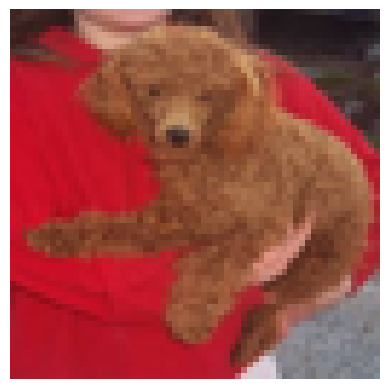

In [37]:
# ========================================
# 🖼️ Visualize an Example from the Dataset
# ========================================

# Index of the example to view
index = 900

# Display the image at the specified index
plt.imshow(X_Orig[index])
plt.axis('off')  # Hide axis ticks for a cleaner look

# Extract and print the corresponding label (1 for cat, 0 for dog)
label = np.squeeze(Y[:, index])
print(label)

---
### 📐 Cell #6: Dataset Shape Summary

This cell prints the shapes of the input data (`X`) and labels (`Y`), along with the number of training examples (`m`).

- `X.shape`: Should be `(number_of_features, number_of_examples)` — each column is a flattened image.
- `Y.shape`: Should be `(1, number_of_examples)` — one label per image.
- `m`: Represents the total number of examples in the dataset.

This check helps ensure that the dataset is loaded and structured correctly before feeding it into the model.


In [38]:
# Get the shapes of the feature and label arrays
shape_X = X.shape
shape_Y = Y.shape

# Number of training examples (i.e., number of columns in X)
m = shape_X[1]

# Print the shapes and number of training examples
print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('I have m = %d training examples!' % (m))

The shape of X is: (12288, 1200)
The shape of Y is: (1, 1200)
I have m = 1200 training examples!


---
### 🔁 Cell #7: Sigmoid Activation Function

This cell defines the `sigmoid` function, a key activation function used in neural networks, especially in binary classification.

- **Input**: A scalar or NumPy array `z` of any shape.
- **Output**: The element-wise sigmoid activation of `z`, defined by the formula:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

The sigmoid function maps input values to the range (0, 1), making it especially useful for binary classification tasks, such as distinguishing cats from dogs.


In [39]:
def sigmoid(z):
    """
    Compute the sigmoid of z.
    
    Arguments:
    z -- A scalar or numpy array of any size.

    Returns:
    s -- The sigmoid of z
    """
    # Apply the sigmoid formula element-wise
    s = 1 / (1 + np.exp(-z))
    return s


---
### 🧱 Cell #8: Define Layer Sizes for the Neural Network

This function sets up the dimensions of each layer in a simple 2-layer neural network:

- `X`: Input dataset of shape `(number_of_features, number_of_examples)`
- `Y`: Labels of shape `(1, number_of_examples)`

The network architecture consists of:
- `n_x`: Number of input features (size of the input layer)
- `n_h`: Number of neurons in the hidden layer (default is 4)
- `n_y`: Number of output units (for binary classification, this is typically 1)

This configuration helps initialize parameters and build the model structure dynamically based on the data dimensions.


In [40]:
def layer_sizes(X, Y, n_h=4):
    """
    Determine the sizes of the input, hidden, and output layers.

    Arguments:
    X -- Input dataset of shape (input size, number of examples)
    Y -- Labels of shape (output size, number of examples)
    n_h -- Number of neurons in the hidden layer (default is 4)

    Returns:
    n_x -- Size of the input layer (number of features)
    n_h -- Size of the hidden layer
    n_y -- Size of the output layer (usually 1 for binary classification)
    """
    n_x = X.shape[0]  # Size of input layer = number of features
    n_y = Y.shape[0]  # Size of output layer = number of output labels (1 here)

    return (n_x, n_h, n_y)


---
### 🧮 Cell #9: Initialize Network Parameters

This function initializes the weight matrices and bias vectors for a two-layer neural network.

**Inputs**:
- `n_x`: Number of input features (input layer size)
- `n_h`: Number of neurons in the hidden layer
- `n_y`: Number of output units (typically 1 for binary classification)

**Initialization Details**:
- **Weights (`W1`, `W2`)**: Initialized with random values from a normal distribution, scaled by He initialization (`np.sqrt(2 / n)`) to improve training stability.
- **Biases (`b1`, `b2`)**: Initialized to zeros.

**Returns**:
- A dictionary containing all the parameters: `W1`, `b1`, `W2`, and `b2`.

> 🔍 *Note:* The commented-out lines show an alternative approach using small constant scaling (`* 0.01`) instead of He initialization.


In [41]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Initialize parameters for a 2-layer neural network.

    Arguments:
    n_x -- Size of the input layer
    n_h -- Size of the hidden layer
    n_y -- Size of the output layer

    Returns:
    parameters -- Dictionary containing:
                  W1 -- Weights for layer 1, shape (n_h, n_x)
                  b1 -- Biases for layer 1, shape (n_h, 1)
                  W2 -- Weights for layer 2, shape (n_y, n_h)
                  b2 -- Biases for layer 2, shape (n_y, 1)
    """
    np.random.seed(2)  # Seed for reproducibility

    # Initialize weights with He initialization (good for ReLU/tanh activations)
    W1 = np.random.randn(n_h, n_x) * np.sqrt(2 / n_x)
    # Alternative: Small random values
    # W1 = np.random.randn(n_h, n_x) * 0.01

    b1 = np.zeros((n_h, 1))  # Bias vector for hidden layer

    W2 = np.random.randn(n_y, n_h) * np.sqrt(2 / n_h)
    # Alternative: Small random values
    # W2 = np.random.randn(n_y, n_h) * 0.01

    b2 = np.zeros((n_y, 1))  # Bias vector for output layer

    # Pack parameters into a dictionary for convenience
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

---
### 🔄 Cell #10: Forward Propagation

This function implements the forward pass of a 2-layer neural network with the following architecture: Input → Linear → Tanh → Linear → Sigmoid

#### **Details**:
- **Inputs**:
  - `X`: Input features, shape `(n_x, m)`
  - `parameters`: Dictionary containing weights and biases (`W1`, `b1`, `W2`, `b2`)

#### **Steps**:
1. Compute first linear step: `Z1 = W1·X + b1`
2. Apply activation: `A1 = tanh(Z1)`
3. Compute second linear step: `Z2 = W2·A1 + b2`
4. Apply activation: `A2 = sigmoid(Z2)` → used for binary classification

#### **Returns**:
- `A2`: Final output activation (prediction probabilities)
- `cache`: Dictionary storing intermediate results (`Z1`, `A1`, `Z2`, `A2`) for use in backpropagation

> ⚠️ Note: The docstring mentions "SOFTMAX", but the actual implementation uses `sigmoid`, which is appropriate for binary classification.


In [43]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> TANH -> LINEAR -> SIGMOID

    Arguments:
    X -- Input data of shape (n_x, m)
    parameters -- Python dictionary containing parameters: W1, b1, W2, b2

    Returns:
    A2 -- The output of the second activation function (sigmoid)
    cache -- A dictionary containing intermediate values: "Z1", "A1", "Z2", "A2"
    """
    # Retrieve parameters from the dictionary
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # First layer linear computation
    Z1 = np.dot(W1, X) + b1
    # Apply non-linear activation (tanh)
    A1 = np.tanh(Z1)

    # Second layer linear computation
    Z2 = np.dot(W2, A1) + b2
    # Final activation (sigmoid for binary classification)
    A2 = sigmoid(Z2)

    # Store intermediate values in a cache for backpropagation
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

---
### 💰 Cell #11: Compute the Cost (Cross-Entropy Loss)

This function calculates the **cross-entropy cost**, a commonly used loss function in binary classification problems.

#### **Inputs**:
- `A2`: The predicted probabilities from the model, shape `(1, m)`
- `Y`: The true binary labels, shape `(1, m)`

#### **Steps**:
1. Clip `A2` to avoid taking log(0), which can cause numerical instability.
2. Apply the binary cross-entropy loss formula:

\[
\text{Cost} = -\frac{1}{m} \sum \left[ y \log(a) + (1 - y) \log(1 - a) \right]
\]

#### **Returns**:
- `cost`: A scalar value representing the model's current loss.

> 🔒 *Clipping values of `A2` ensures numerical safety during log operations.*

In [46]:
def compute_cost(A2, Y):
    """
    Computes the cost using the cross-entropy loss function.

    Arguments:
    A2 -- Output of the second activation function, shape (1, m)
    Y -- True labels, shape (1, m)

    Returns:
    cost -- Cross-entropy cost (scalar)
    """
    m = Y.shape[1]  # Number of examples

    # Prevent log(0) by clipping predictions to a safe range
    epsilon = 1e-8
    A2 = np.clip(A2, epsilon, 1 - epsilon)

    # Compute the cross-entropy loss
    logprobs = (-1 / m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))

    cost = np.sum(logprobs)               # Sum all the log losses
    cost = float(np.squeeze(cost))        # Ensure cost is a scalar, not an array

    return cost

---
### 🔁 Cell #12: Backward Propagation

This function implements **backpropagation** for a 2-layer neural network. It computes gradients of the cost function with respect to each model parameter.

#### **Architecture**: Input → Linear → Tanh → Linear → Sigmoid

#### **Inputs**:
- `X`: Input data of shape `(n_x, m)`
- `Y`: True labels of shape `(1, m)`
- `parameters`: Dictionary containing the current values of weights and biases
- `cache`: Dictionary from forward propagation containing intermediate values (`Z1`, `A1`, `Z2`, `A2`)

#### **Key Steps**:
- Compute the gradient of the loss with respect to `Z2` (output layer)
- Backpropagate to compute gradients w.r.t `W2`, `b2`, `Z1`, `W1`, and `b1`

#### **Returns**:
- `grads`: A dictionary containing gradients for all weights and biases: `dW1`, `db1`, `dW2`, `db2`

> 🧠 *Tanh derivative used here is: \( 1 - A1^2 \)*

In [47]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation for the model: LINEAR->RELU->LINEAR->SOFTMAX

    Arguments:
    X -- input data of shape (n_x, m)
    Y -- true labels of shape (n_y, m)
    parameters -- python dictionary containing your parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y  # Derivative of cost w.r.t. Z2
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # Derivative of TanH
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2}
    
    return grads

---
### ⚙️ Cell #13: Update Parameters with Gradient Descent

This function performs a parameter update step using **gradient descent**.

#### **Inputs**:
- `parameters`: Dictionary containing current weights and biases (`W1`, `b1`, `W2`, `b2`)
- `grads`: Dictionary containing gradients for each parameter (`dW1`, `db1`, `dW2`, `db2`)
- `learning_rate`: Scalar value controlling the size of the update step (default is 1.2)

#### **Process**:
Each parameter is updated by subtracting the gradient scaled by the learning rate:

\[
\theta := \theta - \alpha \times \nabla_{\theta} J
\]

where:
- \(\theta\) is a parameter (`W1`, `b1`, etc.),
- \(\alpha\) is the learning rate,
- \(\nabla_{\theta} J\) is the gradient of the cost with respect to \(\theta\).

#### **Returns**:
- `parameters`: Dictionary containing the updated weights and biases.


In [48]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using gradient descent.

    Arguments:
    parameters -- Dictionary containing current parameters: W1, b1, W2, b2
    grads -- Dictionary containing gradients: dW1, db1, dW2, db2
    learning_rate -- Learning rate for gradient descent (default=1.2)

    Returns:
    parameters -- Dictionary containing updated parameters
    """
    # Deep copy parameters to avoid modifying the original outside this scope
    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])

    # Retrieve gradients
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Perform parameter updates using gradient descent
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    
    # Pack updated parameters into a dictionary
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters


---
### 🧠 Cell #14: Train the Neural Network Model

This function implements the full training process of a **two-layer neural network** with the architecture: Input → Linear → Tanh → Linear → Sigmoid

#### **Arguments**:
- `X`: Input data of shape `(n_x, m)`
- `Y`: True labels of shape `(1, m)`
- `n_h`: Number of hidden units in the hidden layer (default is 4)
- `learning_rate`: Step size for gradient descent (default is 1.2)
- `num_iterations`: Number of iterations to run gradient descent (default is 10,000)
- `iteration_steps`: Frequency of printing the cost during training (default is every 1000 iterations)
- `print_cost`: Boolean flag to print cost periodically during training

#### **Returns**:
- `parameters`: Learned parameters (`W1`, `b1`, `W2`, `b2`) after training
- `costs`: List of cost values recorded at each iteration

In [49]:
def nn_model(X, Y, n_h=4, learning_rate=1.2, num_iterations=10000, iteration_steps=1000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR -> TANH -> LINEAR -> SIGMOID
    
    Arguments:
    X -- Input data of shape (n_x, m)
    Y -- True labels of shape (1, m)
    n_h -- Number of hidden units in the hidden layer
    learning_rate -- Learning rate for gradient descent
    num_iterations -- Number of iterations to train the model
    iteration_steps -- Interval to print cost
    print_cost -- If True, print cost every `iteration_steps`
    
    Returns:
    parameters -- Learned parameters dictionary
    costs -- List of costs for each iteration
    """
    costs = []
    np.random.seed(3)  # Seed for reproducibility
    
    # Get sizes of input and output layers
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters with given layer sizes
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Gradient descent loop
    for i in range(num_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Compute cost for current iteration
        cost = compute_cost(A2, Y)
        
        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Save cost for plotting
        costs.append(cost)
        
        # Print cost periodically
        if print_cost and i % iteration_steps == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return parameters, costs

---
### 🔍 Cell #15: Predict with the Trained Model

This function uses the learned parameters to make binary predictions on a dataset.

#### **Arguments**:
- `parameters`: Dictionary containing the trained weights and biases (`W1`, `b1`, `W2`, `b2`)
- `X`: Input data of shape `(n_x, m)`

#### **Returns**:
- `predictions`: Binary predictions vector of shape `(1, m)` where each element is 0 or 1, based on a threshold of 0.5


In [50]:
def predict(parameters, X):
    """
    Predicts class labels for input data X using learned parameters.

    Arguments:
    parameters -- Dictionary containing model parameters
    X -- Input data of shape (n_x, m)

    Returns:
    predictions -- Binary predictions vector of shape (1, m)
    """
    # Forward propagation to get output probabilities
    A2, cache = forward_propagation(X, parameters)
    
    # Convert probabilities to 0/1 predictions using 0.5 threshold
    predictions = (A2 > 0.5)
    
    return predictions

---
### 🧩 Cell #16: Create Dataset Subsets

This cell creates smaller subsets of the full dataset `X` and `Y` for testing or analysis purposes:

- `X_small` and `Y_small`: First 2,500 examples from the full dataset
- `X_center` and `Y_center`: A smaller slice of 250 examples from indices 250 to 499

In [51]:
# Create smaller dataset slices for testing or visualization

# First 2500 examples from the full dataset
X_small = X[:, :2500]
Y_small = Y[:, :2500]

# A centered slice from index 250 to 499 (250 examples)
X_center = X[:, 250:500]
Y_center = Y[:, 250:500]

---
### 🚀 Cell #17: Train the Neural Network with Custom Hidden Layer Size

In this cell, we train the neural network using:

- A hidden layer size `n_h = 8`
- Learning rate of `0.015`
- `5000` iterations of gradient descent
- Cost printed every `100` iterations to monitor training progress

The trained parameters and cost history are saved for further use.

In [ ]:
# Set hidden layer size
n_h = 8

# Train the model with specified hyperparameters
parameters, costs = nn_model(
    X, 
    Y, 
    n_h, 
    learning_rate=0.015, 
    iteration_steps=100, 
    num_iterations=5000, 
    print_cost=True
)

Cost after iteration 0: 0.757635
Cost after iteration 100: 0.664116
Cost after iteration 200: 0.646192
Cost after iteration 300: 0.627375
Cost after iteration 400: 0.594398
Cost after iteration 500: 0.618107
Cost after iteration 600: 0.577320
Cost after iteration 700: 0.595856
Cost after iteration 800: 0.535996
Cost after iteration 900: 0.554790
Cost after iteration 1000: 0.541893
Cost after iteration 1100: 0.529986
Cost after iteration 1200: 0.517801
Cost after iteration 1300: 0.505575
Cost after iteration 1400: 0.493445
Cost after iteration 1500: 0.481457
Cost after iteration 1600: 0.469628
Cost after iteration 1700: 0.457955
Cost after iteration 1800: 0.446386
Cost after iteration 1900: 0.434813
Cost after iteration 2000: 0.423115
Cost after iteration 2100: 0.411205
Cost after iteration 2200: 0.399054
Cost after iteration 2300: 0.386677
Cost after iteration 2400: 0.373964
Cost after iteration 2500: 0.360132
Cost after iteration 2600: 0.339306
Cost after iteration 2700: 0.269025
Cost

---
### 📉 Cell #18: Plot Training Cost over Iterations

This cell visualizes the cost function value recorded during training to observe the learning progress.

- The x-axis represents iteration number.
- The y-axis represents the cost value.

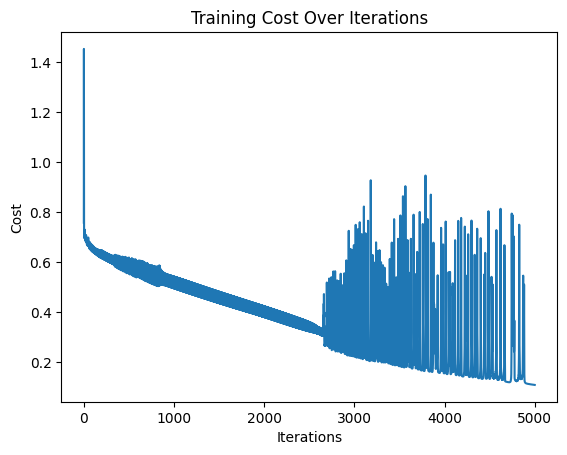

In [52]:
# Plot the cost function over training iterations
plt.plot(np.arange(len(costs)), costs)  # x-axis: iterations, y-axis: cost
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Training Cost Over Iterations')
plt.show()

---
### 🖼️ Predicting on a New Image

To classify a new image using the trained neural network model, follow these steps:

1. **Load and preprocess the image**: Resize it to `64x64` pixels and convert it to RGB format.  
2. **Flatten and normalize** the image data to match the input shape of the model.  
3. **Run forward propagation** with the trained parameters to get prediction probabilities.  
4. **Convert probabilities to binary class predictions** using a threshold of 0.5.  
5. **Map the predicted label** to a human-readable class name.  
6. **Display the image** with the predicted class label.  

This process ensures your new images are prepared consistently with the training data and allows the model to predict accurately.

In [79]:
def predict_new_image(parameters, image_paths):
    # 1. Load your image, resize to (64, 64), and convert to RGB
    img = Image.open(image_paths).resize((64, 64)).convert('RGB')

    # 2. Convert the image to a numpy array and flatten it (to match input shape)
    img_array = np.array(img).reshape(-1, 1) / 255.0  # normalize pixels to [0,1]

    # 3. Use your trained model parameters to predict the class probabilities
    A2, _ = forward_propagation(img_array, parameters)

    # 4. Convert probabilities to binary prediction (0 or 1)
    prediction = (A2 > 0.5)

    # 5. Map prediction to class label (adjust classes accordingly)
    classes = ['dog', 'cat']
    predicted_class = classes[int(prediction)]

    # 6. Print the prediction
    print(f"Predicted class: {image_paths} & {predicted_class}")

In [ ]:
image_dir = './dataset/manual_set/'
image_files = os.listdir(image_dir)  # List all files in the folder

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)  # Full path to image
    
    # Call your prediction function
    predict_new_image(parameters, image_path)